## Tarea 4 del curso CM-072

* Nombres y Apellidos:
* Fecha de presentación: 3 de octubre

Como conjunto de datos vamos a utilizar un subconjunto del [Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/Mushroom) del UCI Machine Learning Repository. 

### Preprocesamiento y selección de características

#### Cargar el conjunto de datos

Estos datos contienen la descripción de muestras hipotéticas de 23 especies de setas con aletas de las familias Agaricus y Lepiota. Cada especie es clasificada como venenosa *(poisonous)* o comestible *(edible)*. [Descripción completa del DataSet](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

datos = pd.read_csv('mushrooms.csv')
datos.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
datos.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Separemos la clase de las demás características. Tomaremos la clase **comestible** (e) como positiva (+1) y *venenosa* (p) como negativa (-1).

In [3]:
y = 2 * (datos['class'] == 'e') - 1   # +1 si (datos['class'] == 'e') == True == 1; -1 si (datos['class'] == 'e') == False == 0
y.head()

/home/bitzer/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


0   -1
1    1
2    1
3   -1
4    1
Name: class, dtype: int64

*Este conjunto de datos es perfectamente separable, por lo que es posible hacer predicciones con un 100% de exactitud. Para aprovechar mejor el ejercicio, vamos a usar solamente 4 de las 23 caracterìsticas:*

In [4]:
X = datos[['cap-shape','bruises','gill-color','stalk-root']]
X.head()

,cap-shape,bruises,gill-color,stalk-root
0,x,t,k,e
1,x,t,k,c
2,b,t,n,c
3,x,t,n,e
4,x,f,k,e


#### Codificación de datos categóricos

Antes de continuar necesitamos convertir los datos categóricos en datos numéricos. Dado que los valores de las columnas no son ordinales, preferimos usar indicadores binarios *(one-hot encoding)* para cada valor de las variables independientes. Pandas tiene una función muy práctica para ello, llamada [`get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [5]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,bruises_f,bruises_t,gill-color_b,gill-color_e,...,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Partición en conjuntos de entrenamiento y prueba

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Entrenamiento de un clasificador de regresión logística

In [7]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression().fit(X_train, y_train)

### Evaluación del modelo

#### Exactitud

En nuestros anteriores ejercicios hemos venido calculando la exactitud *(accuracy)* del modelo, definida como:

$$
\mbox{exactitud} = \frac{\mbox{# predicciones correctas}}{\mbox{# total de muestras}} 
$$

A continuación calcularemos la exactitud del modelo en el **conjunto de prueba** y veremos también el modo de obtener este valor directamente con `scikit-learn`.

In [8]:
from sklearn import metrics

predicciones_test = modelo.predict(X_test)
num_predicciones_correctas = (y_test == predicciones_test).sum()
num_total_de_muestras = len(y_test)
exactitud = num_predicciones_correctas / num_total_de_muestras

print ( 'Predicciones correctas : ', num_predicciones_correctas )
print ( 'Número de muestras     : ', num_total_de_muestras )
print ( 'Exactitud (manual)     : ', exactitud )

# Usando scikit-learn
print ( 'Exactitud (score)      : ', modelo.score(X_test, y_test) )
print ( 'Exactitud (metrics)    : ', metrics.accuracy_score(y_test, predicciones_test) )

Predicciones correctas :  1870
Número de muestras     :  2031
Exactitud (manual)     :  0.9207287050713934
Exactitud (score)      :  0.9207287050713934
Exactitud (metrics)    :  0.9207287050713934


### Matriz de confusión

La matriz de confusión es un sumario del rendimiento de un clasificador.

![](CM.jpg)

Para obtener sus valores usamos el método [`metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

In [9]:
matriz_confusion = metrics.confusion_matrix(y_test, predicciones_test)

# Mapeo según http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
TN = matriz_confusion[0,0]
FN = matriz_confusion[1,0]
FP = matriz_confusion[0,1]
TP = matriz_confusion[1,1]

print ('              +-----------------+')
print ('              |   Predicción    |')
print ('              +-----------------+')
print ('              |    +   |    -   |')
print ('+-------+-----+--------+--------+')
print ('| Valor |  +  |   %d |   %d   |'   % (TP, FN) )
print ('| real  +-----+--------+--------+')
print ('|       |  -  |   %d  |   %d  |'    % (FP, TN) )
print ('+-------+-----+--------+--------+')
print ()
print ( 'Exactitud    : ', (TP+TN)/(TP+FN+FP+TN) )

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   1042 |   19   |
| real  +-----+--------+--------+
|       |  -  |   142  |   828  |
+-------+-----+--------+--------+

Exactitud    :  0.9207287050713934


**Pregunta 1:** ¿Cuántas de las setas venenosas del conjunto de prueba fueron clasificadas como comestibles por el modelo?

**Pregunta 2:** ¿Qué nombre recibe el valor indicado en la pregunta 1?

**Pregunta 3:** ¿Qué proporción de las setas venenosas fueron clasificadas correctamente?

**Pregunta 4:** ¿Qué nombre recibe el valor indicado en la pregunta 3?

**Pregunta 5:** ¿Qué proporción de las setas comestibles fueron clasificadas correctamente?

**Pregunta 6:** ¿Qué nombre recibe el valor indicado en la pregunta 5?

**Pregunta 7:** ¿Qué proporción de las setas clasificadas como comestibles son realmente comestibles?

**Pregunta 8:** ¿Qué nombre recibe el valor indicado en la pregunta 7?

### Tus respuestas
**Respuesta 1:** 142

**Respuesta 2:** False Positive

**Respuesta 3:** 0.85360

**Respuesta 4:** True Negative rate

**Respuesta 5:** 0.98209

**Respuesta 6:** True Positive rate

**Respuesta 7:** 0.880

**Respuesta 8:** Positive Predictive value

### Calculando el costo de los errores

Ponte en el caso de un conjunto de exploradores que dependen del modelo que hemos entrenado para alimentarse de setas. Que se clasifique como venenosa una seta comestible es claramente menos perjudicial que clasificar como comestible una seta venenosa. En otras palabras, **en nuestro caso los falsos negativos cuestan menos que los falsos positivos**.

Supongamos que podemos cuantificar este costo:
1. S/ 1.00 por cada falso negativo
2. S/ 1,000.00 por cada falso positivo
3. Las clasificaciones correctas no representan costo alguno

**Pregunta 9:** Bajo el supuesto indicado, ¿cuál sería el costo total asociado al rendimiento del modelo de regresión logística en el **conjunto de pruebas**?

In [10]:
# Tu respuesta

### Curva ROC

Recordemos que el modelo de regresión logística es optimizado para predecir la probabilidad de que un ejemplo sea positivo, prediciendo $+1$ cuando esta probabilidad es mayor que el **umbral** de $0.5$. Podemos verificarlo:

In [11]:
probabilidades_test = modelo.predict_proba(X_test)
print ('Probabilidad de la clase negativa y de la clase positiva :')
print (probabilidades_test)

Probabilidad de la clase negativa y de la clase positiva :
[[0.07859112 0.92140888]
 [0.36306489 0.63693511]
 [0.05093096 0.94906904]
 ...
 [0.99536211 0.00463789]
 [0.05093096 0.94906904]
 [0.15247325 0.84752675]]


In [12]:
# Predecimos +1 siempre que la probabilidad de la clase positiva sea mayor a 0.5
predicciones_test = np.where(probabilidades_test[:,1] > 0.5, +1, -1) 
print ( 'Exactitud : ', metrics.accuracy_score(y_test, predicciones_test) )

Exactitud :  0.9207287050713934


Si variamos el valor del umbral, podemos controlar el **nivel de confianza** que le exigimos al modelo para sus predicciones. Dependiendo del valor elegido para el umbral, el número de verdaderos positivos y de falsos positivos variarán de manera complementaria con relación al número total de positivos. Esto es lo que se grafica en una curva ROC. 

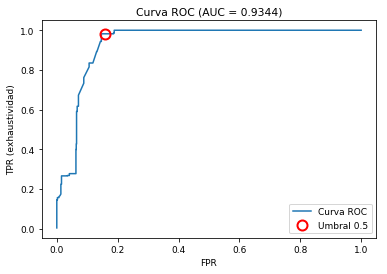

In [13]:
fpr, tpr, umbrales = metrics.roc_curve(y_test, probabilidades_test[:,1])
auc_roc = metrics.roc_auc_score(y_test, probabilidades_test[:,1])

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC (AUC = %.4f)" % auc_roc))
# ubicamos el punto más cercano a 0.5
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)

**Pregunta 10:** Según la curva ROC del modelo, ¿cuál de las siguientes dos medidas es mayor en el punto de operación correspondiente al umbral de probabilidad $0.5$: exhaustividad o tasa de falsos positivos?

In [14]:
# Tu respuesta

#### Precisión y exhaustividad

En casos como este, no nos importa tanto el número total de errores sino más bien disminuir el número de falsos positivos, lo cual implica aumentar la **precisión**:

$$
\mbox{precisión} = \frac{\text{# ejemplos positivos clasificados como positivos}}{\text{# ejemplos clasificados como positivos}} = \frac{TP}{TP + FP}
$$

Obtengamos la precisión de nuestro modelo en el conjunto de pruebas (umbral por defecto $0.5$):

In [15]:
print ( 'Precisión           : ', TP/(TP+FP) ) 

# Usando scikit-learn
print ( 'Precisión (metrics) : ', metrics.precision_score(y_test, predicciones_test) )

Precisión           :  0.8800675675675675
Precisión (metrics) :  0.8800675675675675


La exhaustividad *(recall)* es una medida complementaria a la precisión:
    
$$
\mbox{exhaustividad} = \frac{\text{# ejemplos positivos clasificados como positivos}}{\text{# ejemplos positivos}} = \frac{TP}{TP + FN}
$$

Obtengamos la exhastividad de nuestro modelo en el conjunto de pruebas:

In [16]:
print ( 'Exhaustividad           : ', TP/(TP+FN) ) 

# Usando scikit-learn
print ( 'Exhaustividad (metrics) : ', metrics.recall_score(y_test, predicciones_test) )

Exhaustividad           :  0.9820923656927427
Exhaustividad (metrics) :  0.9820923656927427


**Pregunta 11:** ¿Cuál será la exhaustividad de un modelo que prediga siempre $+1$? 

In [17]:
# Tu respuesta

Para mejorar la precisión, podemos intentar exigir un mayor nivel de confianza en las predicciones. Veamos lo que ocurre si establecemos un umbral alto de $0.92$ y uno muy alto de $0.95$:

In [18]:
print ( 'Umbral 0.5' )
print ( '----------' )
print ( 'Número de predicciones positivas : ', (predicciones_test == 1).sum() )
print ( 'Exactitud     : ', metrics.accuracy_score(y_test, predicciones_test) )
print ( 'Precisión     : ', metrics.precision_score(y_test, predicciones_test) )
print ( 'Exhaustividad : ', metrics.recall_score(y_test, predicciones_test) )

print ()

predicciones_test_umbral_alto = np.where(probabilidades_test[:,1] > 0.92, +1, -1) 
print ( 'Umbral 0.92' )
print ( '-----------' )
print ( 'Número de predicciones positivas : ', (predicciones_test_umbral_alto == 1).sum() )
print ( 'Exactitud     : ', metrics.accuracy_score(y_test, predicciones_test_umbral_alto) )
print ( 'Precisión     : ', metrics.precision_score(y_test, predicciones_test_umbral_alto) )
print ( 'Exhaustividad : ', metrics.recall_score(y_test, predicciones_test_umbral_alto) )
print ()

predicciones_test_umbral_muy_alto = np.where(probabilidades_test[:,1] > 0.95, +1, -1) 
print ( 'Umbral 0.95' )
print ( '-----------' )
print ( 'Número de predicciones positivas : ', (predicciones_test_umbral_muy_alto == 1).sum() )
print ( 'Exactitud     : ', metrics.accuracy_score(y_test, predicciones_test_umbral_muy_alto) )
print ( 'Precisión     : ', metrics.precision_score(y_test, predicciones_test_umbral_muy_alto) )
print ( 'Exhaustividad : ', metrics.recall_score(y_test, predicciones_test_umbral_muy_alto) )


Umbral 0.5
----------
Número de predicciones positivas :  1184
Exactitud     :  0.9207287050713934
Precisión     :  0.8800675675675675
Exhaustividad :  0.9820923656927427

Umbral 0.92
-----------
Número de predicciones positivas :  356
Exactitud     :  0.5928114229443624
Precisión     :  0.8286516853932584
Exhaustividad :  0.2780395852968897

Umbral 0.95
-----------
Número de predicciones positivas :  273
Exactitud     :  0.5972427375677006
Precisión     :  0.945054945054945
Exhaustividad :  0.24316682375117812


**Pregunta 12:** ¿En el umbral $0.95$ se tiene una mayor precisión que en $0.5$?

**Pregunta 13:** ¿Aumentar el umbral garantiza un aumento de la precisión?

In [19]:
# Tus respuestas

#### Curva de precisión-exhaustividad

Examina la curva de precisión-exhaustividad, en la que marcaremos los tres umbrales anteriores.

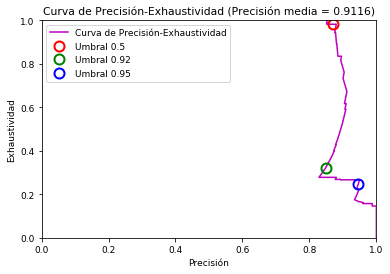

In [20]:
precision, exhaustividad, umbrales = metrics.precision_recall_curve(y_test, probabilidades_test[:,1])
precision_media = metrics.average_precision_score(y_test, probabilidades_test[:,1])

plt.plot(precision, exhaustividad, label= ("Curva de Precisión-Exhaustividad"), c='m' )
plt.xlabel("Precisión")
plt.ylabel("Exhaustividad")
plt.title(("Curva de Precisión-Exhaustividad (Precisión media = %.4f)" % precision_media))

umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(precision[umbral_05], exhaustividad[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)

umbral_092 = np.argmin(np.abs(umbrales - 0.92))
plt.plot(precision[umbral_092], exhaustividad[umbral_092], 'o', markersize=10,
         label="Umbral 0.92", fillstyle="none", c='g', mew=2)

umbral_095 = np.argmin(np.abs(umbrales - 0.95))
plt.plot(precision[umbral_095], exhaustividad[umbral_095], 'o', markersize=10,
         label="Umbral 0.95", fillstyle="none", c='b', mew=2)

plt.gca().set_xlim([0,1])
plt.gca().set_ylim([0,1])
plt.legend(loc='best', numpoints = 1)

### Escogiendo un punto de operación

Supongamos que queremos buscar como punto de operación el umbral que resulte en la mayor exhaustividad con una precisión igual o mayor a 95%.

In [21]:
umbrales_precision_exhaustividad = pd.DataFrame({ 
        'Exhaustividad' : exhaustividad,
        'Precisión' : precision,
        'Umbrales' : np.append(umbrales, 1) # El último umbral es siempre 1
    })

umbrales_precision_exhaustividad[umbrales_precision_exhaustividad['Precisión'] >= .95].head()

,Exhaustividad,Precisión,Umbrales
67,0.162111,0.960894,0.972981
68,0.157399,0.959770,0.973055
69,0.157399,0.988166,0.974452
70,0.146089,0.987261,0.974645
71,0.146089,1.000000,0.975079


**Pregunta 14:** ¿Si queremos alcanzar una precisión de 95%, qué nivel mínimo de confianza debemos exigir a la probabilidad producida por el modelo?

In [22]:
# Tu respuesta